# Category 1: Using existing data to make inferences about the creative process of the Royal Rumble match

We know ex ante that the Royal Rumble is a scripted event, i.e. that it is deterministic. The entrants are purported to be drawn at random. It *could* be the case that some, or all of the entrants are drawn at random, but it seems exceedingly unlikely given how critical specific storytelling elements are to the product. Anecdotally, I observed that many of the eliminations are between wrestlers in an existing feud, or one will emerge from the event. The first part of the analysis can look for predictions along this axis- how different do wrestlers' individual distributions on their entry number look compared to the discrete uniform distribution on {1,2,...,30}?
My suspicion is that the best predictor of winning the Royal Rumble is *how many eliminations that wrestler has,* as the winner is intended to be a strong character who is featured prominently in the biggest wrestling events of the year. What other factors outside of the 'kayfabe world' (kayfabe is an insider wrestling term, essentially meaning in-storyline) determine whether or not an entrant will perform well or poorly? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
RUMBLE_DATA = pd.read_csv('/home/christian/Desktop/Royal_Rumble_Analysis/RumbleData.csv').copy()

def time_cleaner(time_string):
    """
    Convert video timestamps into seconds
    """
    return 3600*int(time_string[0]) + 60*int(time_string[1]) + int(time_string[2])

RUMBLE_DATA['entry_time'] = RUMBLE_DATA['entry_time'].astype(str)
RUMBLE_DATA['exit_time'] = RUMBLE_DATA['exit_time'].astype(str)
ENTRY_TIME_SPLIT = RUMBLE_DATA['entry_time'].str.split(':')
EXIT_TIME_SPLIT = RUMBLE_DATA['exit_time'].str.split(':')



In [3]:
print(RUMBLE_DATA.loc[RUMBLE_DATA['exit_time'].isna() == True])

Empty DataFrame
Columns: [year, entry_num, exit_num, name, entry_time, exit_time, total_time, elim_by, solo_elim, group_elim, illegal_elim, alignment, tag_overlap, tag_team, tag_partner, illegal_exit, accidental_exit, cum_elim, avg_cum_elim, world_champ, Unnamed: 20, cum_time, avg_cum_time, prev_app, us_champ, cruise_champ, euro_champ]
Index: []

[0 rows x 27 columns]


In [4]:

FRUMBLE_DATA = pd.read_csv('/home/christian/Desktop/Royal_Rumble_Analysis/RumbleData.csv').copy()

def time_cleaner(time_string):
    """
    Convert video timestamps into seconds
    """
    return 3600*int(time_string[0]) + 60*int(time_string[1]) + int(time_string[2])

RUMBLE_DATA['entry_time'] = RUMBLE_DATA['entry_time'].astype(str)
RUMBLE_DATA['exit_time'] = RUMBLE_DATA['exit_time'].astype(str)
ENTRY_TIME_SPLIT = RUMBLE_DATA['entry_time'].str.split(':')
EXIT_TIME_SPLIT = RUMBLE_DATA['exit_time'].str.split(':')

RUMBLE_DATA['entry_time'] = ENTRY_TIME_SPLIT.apply(time_cleaner)
RUMBLE_DATA['exit_time'] = EXIT_TIME_SPLIT.apply(time_cleaner)

for year in RUMBLE_DATA['year'].unique():
    RUMBLE_DATA.loc[RUMBLE_DATA['year'] == year, 'exit_time'] = (RUMBLE_DATA.loc[RUMBLE_DATA['year'] == year, 'exit_time'] -
                                                                RUMBLE_DATA.loc[RUMBLE_DATA['year'] == year, 'entry_time'].min())
    
    RUMBLE_DATA.loc[RUMBLE_DATA['year'] == year, 'entry_time'] = (RUMBLE_DATA.loc[RUMBLE_DATA['year'] == year, 'entry_time'] -
                                                                  RUMBLE_DATA.loc[RUMBLE_DATA['year'] == year, 'entry_time'].min())

    

RUMBLE_DATA['total_time'] = RUMBLE_DATA['exit_time'] - RUMBLE_DATA['entry_time']
RUMBLE_DATA['total_elim'] = (RUMBLE_DATA['solo_elim'] + RUMBLE_DATA['group_elim'] + 
                             RUMBLE_DATA['illegal_elim'])

MATCH_DATA = pd.DataFrame()

for year in RUMBLE_DATA['year'].unique():
    entry_times = RUMBLE_DATA.loc[RUMBLE_DATA['year'] == year, 'entry_time'].unique().tolist()
    exit_times = RUMBLE_DATA.loc[RUMBLE_DATA['year'] == year, 'exit_time'].unique().tolist()
    split_times = entry_times + exit_times
    split_times.sort()
    year_list = []
    for i in range(len(split_times)):
        year_list.append(year)
    year_series = pd.Series(year_list)
    split_series = pd.Series(split_times)
    year_split = pd.concat([year_series, split_series], axis=1)
    MATCH_DATA = pd.concat([MATCH_DATA, year_split], axis=0)

MATCH_DATA.columns = ['year', 'split']

RUMBLE_DATA.fillna(0)

,year,entry_num,exit_num,name,entry_time,exit_time,total_time,elim_by,solo_elim,group_elim,...,avg_cum_elim,world_champ,Unnamed: 20,cum_time,avg_cum_time,prev_app,us_champ,cruise_champ,euro_champ,total_elim
0,1988,1,8,Bret Hart,0,1546,1546,Don Muraco,0,1,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1988,2,2,Tito Santana,0,644,644,"Bret Hart, Jim Neidhart",0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1988,3,1,Butch Reed,128,325,197,Jake Roberts,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1988,4,6,Jim Neidhart,230,1376,1146,Hillbilly Jim,0,1,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1988,5,10,Jake Roberts,321,1634,1313,One Man Gang,1,1,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1997,26,25,Mankind,2235,2971,736,The Undertaker,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
286,1997,27,21,Flash Funk,2312,2683,371,Vader,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
287,1997,28,26,Vader,2414,3017,603,Stone Cold Steve Austin,1,0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
288,1997,29,22,Henry O. Godwinn,2497,2868,371,The Undertaker,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


From randomly sampling the different wrestlers, I was able to hone in on a couple of important trends. For some wrestlers, the distribution looks *reasonably* random. You can discern a pattern from the distribution below, but it's not terribly strong.

(1988, 1997)

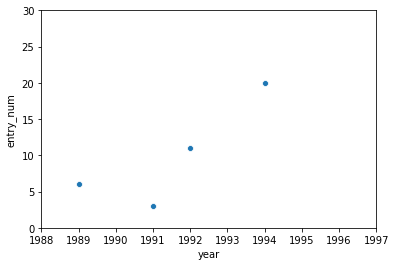

In [5]:
sns.scatterplot(x = 'year', y = 'entry_num', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Greg Valentine'])
plt.ylim(0,30)
plt.xlim(1988,1997)


For others, not so much. The two sets of plots below are for Jimmy Snuka and Tatanka respectively. Jimmy Snuka's prime was in the 70's and early 80's, whereas Tatanka was a wrestler who was consistently an undercard or midcard act. In either case, these are wrestlers that the fans *know* are not going to win the Royal Rumble- who don't stand a reasonable chance of winning, and who aren't going to make many eliminations. These wrestlers won't typically appear in the match for a long time- it's their job to make the big names look good. The first plot shows their entry number in each year that they entered, while the next plot has their entry number stacked next to their eliminations and the amount of time they spend in the match.

(1988, 1997)

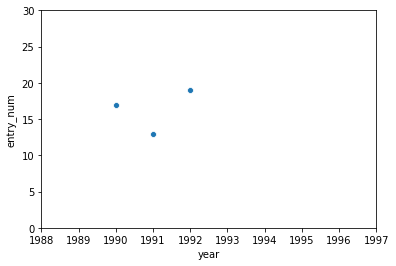

In [6]:
sns.scatterplot(x = 'year', y = 'entry_num', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Jimmy Snuka'])
plt.ylim(0,30)
plt.xlim(1988,1997)


A very tight cluster in the middle.

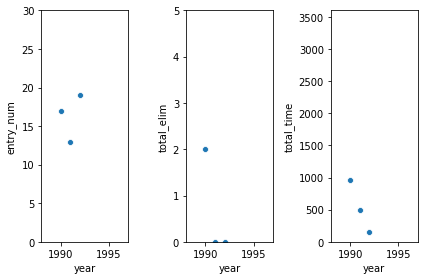

In [7]:
plt.subplot(1,3,1)
sns.scatterplot(x = 'year', y = 'entry_num', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Jimmy Snuka'])
plt.ylim(0,30)
plt.xlim(1988,1997)

plt.subplot(1,3,2)
sns.scatterplot(x = 'year', y = 'total_elim', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Jimmy Snuka'])
plt.ylim(0,5)
plt.xlim(1988,1997)

plt.subplot(1,3,3)
sns.scatterplot(x = 'year', y = 'total_time', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Jimmy Snuka'])
plt.xlim(1988,1997)
plt.ylim(0,3600)
plt.tight_layout()

(1988, 1997)

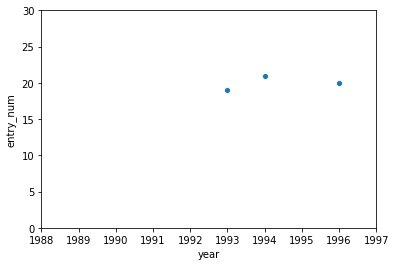

In [8]:
sns.scatterplot(x = 'year', y = 'entry_num', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Tatanka'])
plt.ylim(0,30)
plt.xlim(1988,1997)

Small samples can do strange things, but I'm very skeptical that Tatanka was randomly drawn into this cluster! 

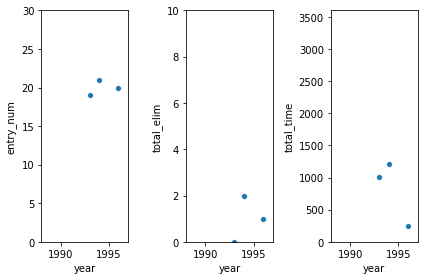

In [9]:
plt.subplot(1,3,1)
sns.scatterplot(x = 'year', y = 'entry_num', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Tatanka'])
plt.ylim(0,30)
plt.xlim(1988,1997)

plt.subplot(1,3,2)
sns.scatterplot(x = 'year', y = 'total_elim', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Tatanka'])
plt.ylim(0,10)
plt.xlim(1988,1997)

plt.subplot(1,3,3)
sns.scatterplot(x = 'year', y = 'total_time', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Tatanka'])
plt.xlim(1988,1997)
plt.ylim(0,3600)
plt.tight_layout()

We can contrast this with Bret Hart and Shawn Michaels, who are two of the most famous and successful wrestlers of this era. Both won Royal Rumbles (Hart in '94, Michaels in '95 and '96), but both also spend the late 80's and early 90's as members of tag teams- not at the top of the card. There are gaps missing for Bret Hart due to his having other prominent matches on the Royal Rumble card in the years 1989, 1993, 1995, and 1996, and similarly for Shawn Michaels in 1991 and 1993.

(1988, 1997)

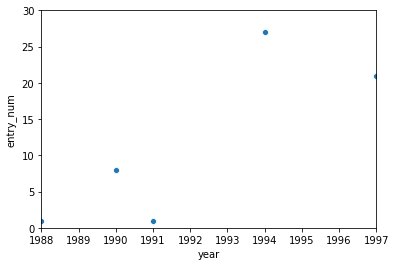

In [10]:
sns.scatterplot(x = 'year', y = 'entry_num', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Bret Hart'])
plt.ylim(0,30)
plt.xlim(1988,1997)


What we observe here is a trend that seems to appear for many of the big names- a sort of bifurcation. These wrestlers tend to appear in the very beginning or towards the very end of the Royal Rumble.

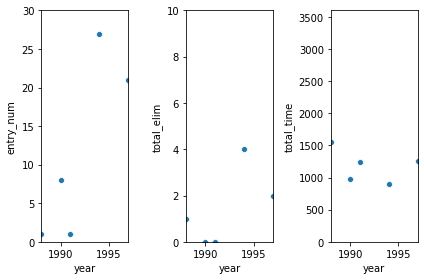

In [11]:
plt.subplot(1,3,1)
sns.scatterplot(x = 'year', y = 'entry_num', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Bret Hart'])
plt.ylim(0,30)
plt.xlim(1988,1997)

plt.subplot(1,3,2)
sns.scatterplot(x = 'year', y = 'total_elim', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Bret Hart'])
plt.ylim(0,10)
plt.xlim(1988,1997)

plt.subplot(1,3,3)
sns.scatterplot(x = 'year', y = 'total_time', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Bret Hart'])
plt.xlim(1988,1997)
plt.ylim(0,3600)
plt.tight_layout()

Now, the scale is the same across all of these plots- Bret Hart's total time in the Royal Rumble was, in general, between 1000 and 1500 seconds (16-25 minutes). Tatanka's times above are certainly, and statistically significantlly worse than this- but not *drastically* so. A close look at the dataframe might help inform our analysis.

In [12]:
RUMBLE_DATA.loc[(RUMBLE_DATA['name'] == 'Bret Hart') | (RUMBLE_DATA['name'] == 'Tatanka')]

,year,entry_num,exit_num,name,entry_time,exit_time,total_time,elim_by,solo_elim,group_elim,...,avg_cum_elim,world_champ,Unnamed: 20,cum_time,avg_cum_time,prev_app,us_champ,cruise_champ,euro_champ,total_elim
0,1988,1,8,Bret Hart,0,1546,1546,Don Muraco,0,1,...,0.0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1
57,1990,8,9,Bret Hart,721,1699,978,Dusty Rhodes,0,0,...,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
80,1991,1,4,Bret Hart,0,1238,1238,The Undertaker,0,0,...,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
158,1993,19,20,Tatanka,2073,3086,1013,Yokozuna,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
190,1994,21,23,Tatanka,1807,3016,1209,Bam Bam Bigelow,1,1,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
196,1994,27,29,Bret Hart,2409,3307,898,Lex Luger,2,2,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
249,1996,20,17,Tatanka,2213,2461,248,Diesel,1,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
280,1997,21,29,Bret Hart,1767,3027,1260,Stone Cold Steve Austin,2,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


Some of the  qualitative differences jump out immediately.  In the years 1993 and 1994, Tatanka spent 15-18 or so minutes in the Royal Rumble, but didn't seem to do anything too significant in that time- he had 2 eliminations in 1994, but his entry number never drifts very far from his exit number. There are two important observations therein. One is that, as entry number increases, the floor on your exit number increases. If you are the last entrant, as Duke Droese in 1996 (a literal wrestling garbage man), you will necessarily have a higher exit number than a significant proportion than those who came before you. This means that we *have to derive a performance metric that normalizes time spent in the ring.* This is imperative if we want to use time series elements to try and predict the *entry* order. Some wrestlers are trusted to spend a great deal of time in the ring and act as a general- and we would anticipate wrestlers who fit that mold to be entered earlier than later. If the trend that's appeared in this small portion of the data continues- i.e. that the star athletes will enter in the beginning or in the end, that should be reflected in the regression predictions.

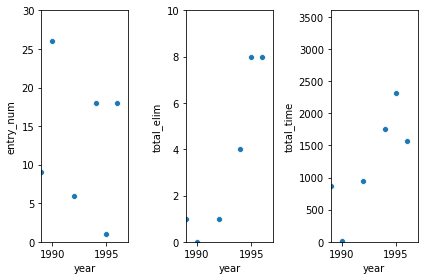

In [13]:
plt.subplot(1,3,1)
sns.scatterplot(x = 'year', y = 'entry_num', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Shawn Michaels'])
plt.ylim(0,30)
plt.xlim(1989,1997)

plt.subplot(1,3,2)
sns.scatterplot(x = 'year', y = 'total_elim', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Shawn Michaels'])
plt.ylim(0,10)
plt.xlim(1989,1997)

plt.subplot(1,3,3)
sns.scatterplot(x = 'year', y = 'total_time', data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Shawn Michaels'])
plt.xlim(1989,1997)
plt.ylim(0,3600)
plt.tight_layout()

In [14]:
import category_encoders

In [15]:
RUMBLE_DATA.columns

Index(['year', 'entry_num', 'exit_num', 'name', 'entry_time', 'exit_time',
       'total_time', 'elim_by', 'solo_elim', 'group_elim', 'illegal_elim',
       'alignment', 'tag_overlap', 'tag_team', 'tag_partner', 'illegal_exit',
       'accidental_exit', 'cum_elim', 'avg_cum_elim', 'world_champ',
       'Unnamed: 20', 'cum_time', 'avg_cum_time', 'prev_app', 'us_champ',
       'cruise_champ', 'euro_champ', 'total_elim'],
      dtype='object')

In [16]:
for wrestler in RUMBLE_DATA['name'].unique():
    year_count = 0
    elim_count = 0
    time_count = 0
    app_count = 0
    
    for year in RUMBLE_DATA.loc[RUMBLE_DATA['name'] == wrestler, 'year']:
        RUMBLE_DATA.loc[(RUMBLE_DATA['name'] == wrestler) &
                                (RUMBLE_DATA['year']== year), 'prev_app'] = year_count
        year_count += 1
        elim_count += int(RUMBLE_DATA.loc[(RUMBLE_DATA['name'] == wrestler) &
                                        (RUMBLE_DATA['year']== year), 'total_elim'])
        time_count += int(RUMBLE_DATA.loc[(RUMBLE_DATA['name'] == wrestler) &
                                        (RUMBLE_DATA['year']== year), 'total_time'])
        RUMBLE_DATA.loc[(RUMBLE_DATA['name'] == wrestler) &
                                (RUMBLE_DATA['year']== year), 'cum_elim'] = elim_count
        RUMBLE_DATA.loc[(RUMBLE_DATA['name'] == wrestler) &
                                (RUMBLE_DATA['year']== year), 'avg_cum_elim'] = elim_count/year_count
        RUMBLE_DATA.loc[(RUMBLE_DATA['name'] == wrestler) &
                                (RUMBLE_DATA['year']== year), 'cum_time'] = time_count
        RUMBLE_DATA.loc[(RUMBLE_DATA['name'] == wrestler) &
                                (RUMBLE_DATA['year']== year), 'avg_cum_time'] = time_count/year_count       

Trying to predict the entry is a fairly sophisticated time series problem- I only found one paper about ordinal time series models, and it's fairly recent. That being said, we can just try some of the inputs across a host of different encoding structures and GLM models and see what sticks.

In [25]:
X = RUMBLE_DATA[['year','name','alignment', 'cum_elim', 'avg_cum_elim', 
                 'world_champ', 'cum_time', 'avg_cum_time']]

y = RUMBLE_DATA['entry_num']

We want to come up with metrics that we will have access to going into a forthcoming Royal Rumble- it will be perfectly easy for the model to predict entrance number based on exit number, who eliminated who, etc. Hence the models below (I know why they are predicting so well, but after many attempts to figure out how to do a stratified train/test split and not being able to I hit a wall, and it feels much more like an extremely dumb thing that I'm missing through hours of combing and cleaning the data more than a lapse in understanding): 

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

enc = OneHotEncoder(handle_unknown = 'ignore')

enc.fit(X)

encoded_X = enc.transform(X)

reg = LinearRegression().fit(encoded_X,y)

reg.score(encoded_X,y)

0.9999999999999518

In [27]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression().fit(encoded_X,y)

reg.score(encoded_X,y)

/home/christian/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/christian/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0

Once I figure out how to encode the data properly I can get a functional model going!